# ISS Tracking

## Track the position of the ISS over the earth.

In [1]:
# Import all packages needed

import geopandas 
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
%matplotlib inline

## ISS info

Use requests to fetch the ISS positional data from the ISS API. Manipulate the data to create Point objects of the coordinates as a column.

In [18]:
# Create a loop to get the ISS info over 180 minutes every 5 seconds

ISS_loc = []
count = 0
while count <= 2160:    
    # Reachout to the ISS API
    response = requests.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    
    # Check status code for an appropriate response fromt the API
    if status != 200:
        print(f'Error improper response code. Code is {status}')
        break
    else:
        # Turn the API response into JSON
        resp = response.json()
        # append each API response to the list of ISS locations
        ISS_loc.append(resp)
        # pause the loop for 5 seconds to allow the ISS to move slightly
        time.sleep(5)
        # Add to the count so it doesn't access the API too many times
        count = count + 1

In [35]:
# Check the data from the API
len(ISS_loc)

2161

In [ ]:
# Initialize empty dictionary ( will become the ISS dataframe)
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}
# Initialize empty lists to populate with values from the API
lat_list = []
long_list = []
time_list = []

# Loop through the API list and extract latitude, longitude, and timestamp
for i in range(0,len(ISS_loc)):
    lat_list.append(ISS_loc[i]['iss_position']['latitude'])
    long_list.append(ISS_loc[i]['iss_position']['longitude'])
    time_list.append(ISS_loc[i]['timestamp'])

# Populate ISS dictionary
ISS_dict['latitude'] = lat_list
ISS_dict['longitude'] = long_list
ISS_dict['timestamp'] = time_list

In [51]:
print(ISS_dict['timestamp'][0:4])

[1568038763, 1568038768, 1568038774, 1568038779]


In [20]:
# Turn the ISS position dictionary into a data frame 
ISS_df = pd.DataFrame.from_dict(ISS_dict)

In [21]:
# Inspect ISS dataframe 
ISS_df.head()

,latitude,longitude,timestamp
0,50.8591,176.0984,1568038763
1,50.9223,176.6325,1568038768
2,50.9828,177.1681,1568038774
3,51.0354,177.6563,1568038779
4,51.0908,178.1945,1568038784


In [22]:
# Change values to integers from strings
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)


In [23]:
# Make a coordinates column that has a value of a list of longitude and latitude
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()

In [54]:
ISS_df.shape

(2161, 4)

In [24]:
# Make the coordinate column a Point object
ISS_df['coordinates'] = ISS_df['coordinates'].apply(Point)

In [25]:
# Inspect the ISS_df
ISS_df.head()

,latitude,longitude,timestamp,coordinates
0,50.8591,176.0984,1.568039e+09,POINT (176.0984 50.8591)
1,50.9223,176.6325,1.568039e+09,POINT (176.6325 50.9223)
2,50.9828,177.1681,1.568039e+09,POINT (177.1681 50.9828)
3,51.0354,177.6563,1.568039e+09,POINT (177.6563 51.0354)
4,51.0908,178.1945,1.568039e+09,POINT (178.1945 51.0908)


In [26]:
# Convert pandas datframe into a geopandas dataframe
geo_ISS = geopandas.GeoDataFrame(ISS_df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_ISS))
geo_ISS.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,latitude,longitude,timestamp,coordinates
0,50.8591,176.0984,1.568039e+09,POINT (176.0984 50.8591)
1,50.9223,176.6325,1.568039e+09,POINT (176.6325 50.9223)
2,50.9828,177.1681,1.568039e+09,POINT (177.1681 50.9828)
3,51.0354,177.6563,1.568039e+09,POINT (177.6563 51.0354)
4,51.0908,178.1945,1.568039e+09,POINT (178.1945 51.0908)


In [27]:
geo_ISS.to_csv('Geo_ISS_df')

## Earth info

Used this [custom GEOJSON Creator](https://geojson-maps.ash.ms/) to create a GEOJSON file. Read the file in as a Geopandas dataframe and inspected it.

In [28]:
# Read in the geojson file and inspect it
earth = geopandas.read_file("custom.geo.json")
earth.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,3,Admin-0 country,5,Netherlands,NL1,1,2,Country,Aruba,ABW,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,ABW.geojson,"POLYGON ((-69.89912109375 12.45200195312499, -..."
1,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,(POLYGON ((-73.02685546874994 21.1923828125000...
2,1,Admin-0 country,5,Barbados,BRB,0,2,Sovereign country,Barbados,BRB,...,Americas,Caribbean,Latin America & Caribbean,8,8,5,3,1,BRB.geojson,"POLYGON ((-59.49331054687499 13.081982421875, ..."
3,1,Admin-0 country,6,Antigua and Barbuda,ATG,0,2,Sovereign country,Antigua and Barbuda,ATG,...,Americas,Caribbean,Latin America & Caribbean,17,19,6,4,1,ATG.geojson,(POLYGON ((-61.71606445312502 17.0370117187499...
4,3,Admin-0 country,6,United Kingdom,GB1,1,2,Dependency,Bermuda,BMU,...,Americas,Northern America,North America,7,7,5,4,-99,BMU.geojson,"POLYGON ((-64.73027343749999 32.29345703125, -..."


In [56]:
# Further inspection of the earth geodataframe
earth.info

<bound method DataFrame.info of      scalerank       featurecla  labelrank                      sovereignt  \
0            3  Admin-0 country          5                     Netherlands   
1            1  Admin-0 country          4                     The Bahamas   
2            1  Admin-0 country          5                        Barbados   
3            1  Admin-0 country          6             Antigua and Barbuda   
4            3  Admin-0 country          6                  United Kingdom   
5            1  Admin-0 country          5                      Costa Rica   
6            1  Admin-0 country          2                          Canada   
7            1  Admin-0 country          6                  United Kingdom   
8            1  Admin-0 country          6                          Belize   
9            1  Admin-0 country          3                            Cuba   
10           3  Admin-0 country          6                          France   
11           1  Admin-0 country 

In [30]:
# Further inspection of the earth geodataframe
earth.shape

(232, 65)

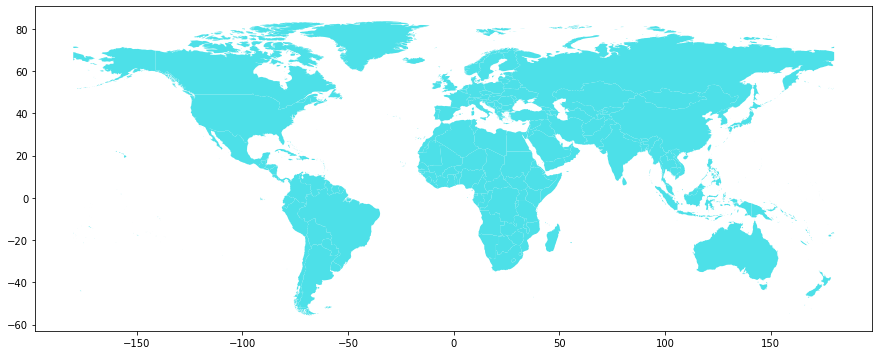

In [57]:
# View the plot of the geojson Polygon objects
earth.plot(figsize=(15,10), color='#4DE0E8')

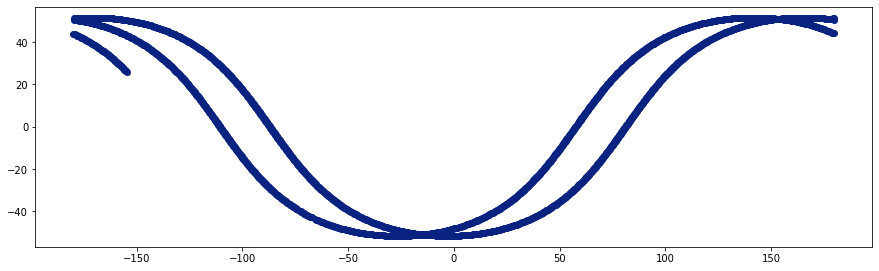

In [32]:
#Plot the ISS Path
geo_ISS.plot(figsize=(15,10), color='#0B2380')

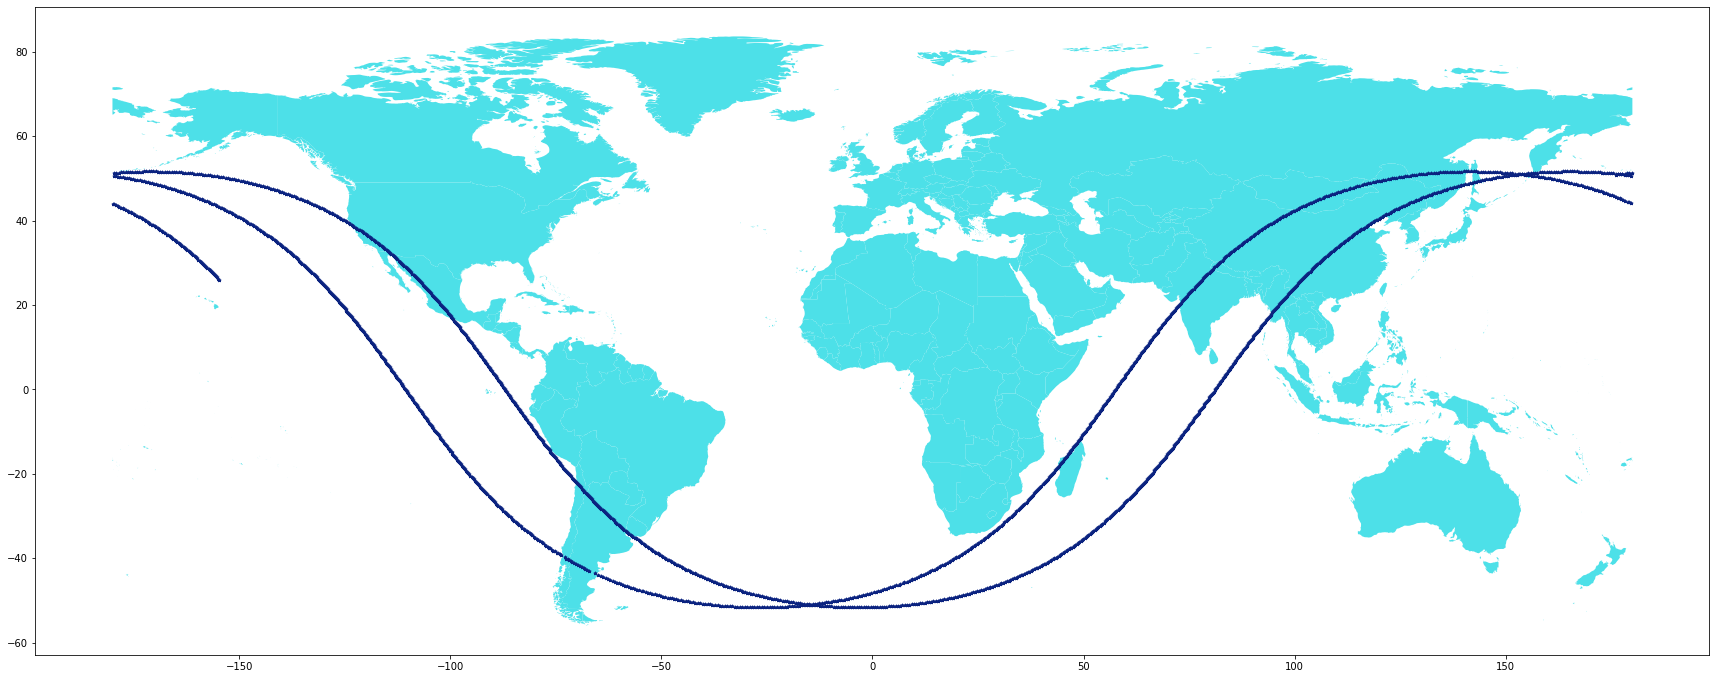

In [33]:
# Plotting to see the ISS overlay the world:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#4DE0E8')

# plotting the ISS position over the eart with navy
geo_ISS.plot(ax=base, color='#0B2380', marker="*", markersize=10);

In [66]:
# Read in the Indian Sub geojson file and inspect it
ind = geopandas.read_file("D:\GIS\ISS\india-master\state\india_state.geojson")
ind.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"(POLYGON ((93.78772735595709 6.85264015197771,..."
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"(POLYGON ((80.27458190917997 13.4595832824707,..."
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15777587890631 29.38310050964355,..."
3,105,IND,India,4,Assam,None,None,State,State,(POLYGON ((89.87145233154291 25.53729820251459...
4,105,IND,India,5,Bihar,None,None,State,State,"(POLYGON ((88.1054763793947 26.53903961181652,..."


In [72]:
mp = ind[ind['NAME_1'] == 'Madhya Pradesh']
mp.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
19,105,IND,India,20,Madhya Pradesh,None,None,State,State,"POLYGON ((78.36464691162126 26.86884117126465,..."


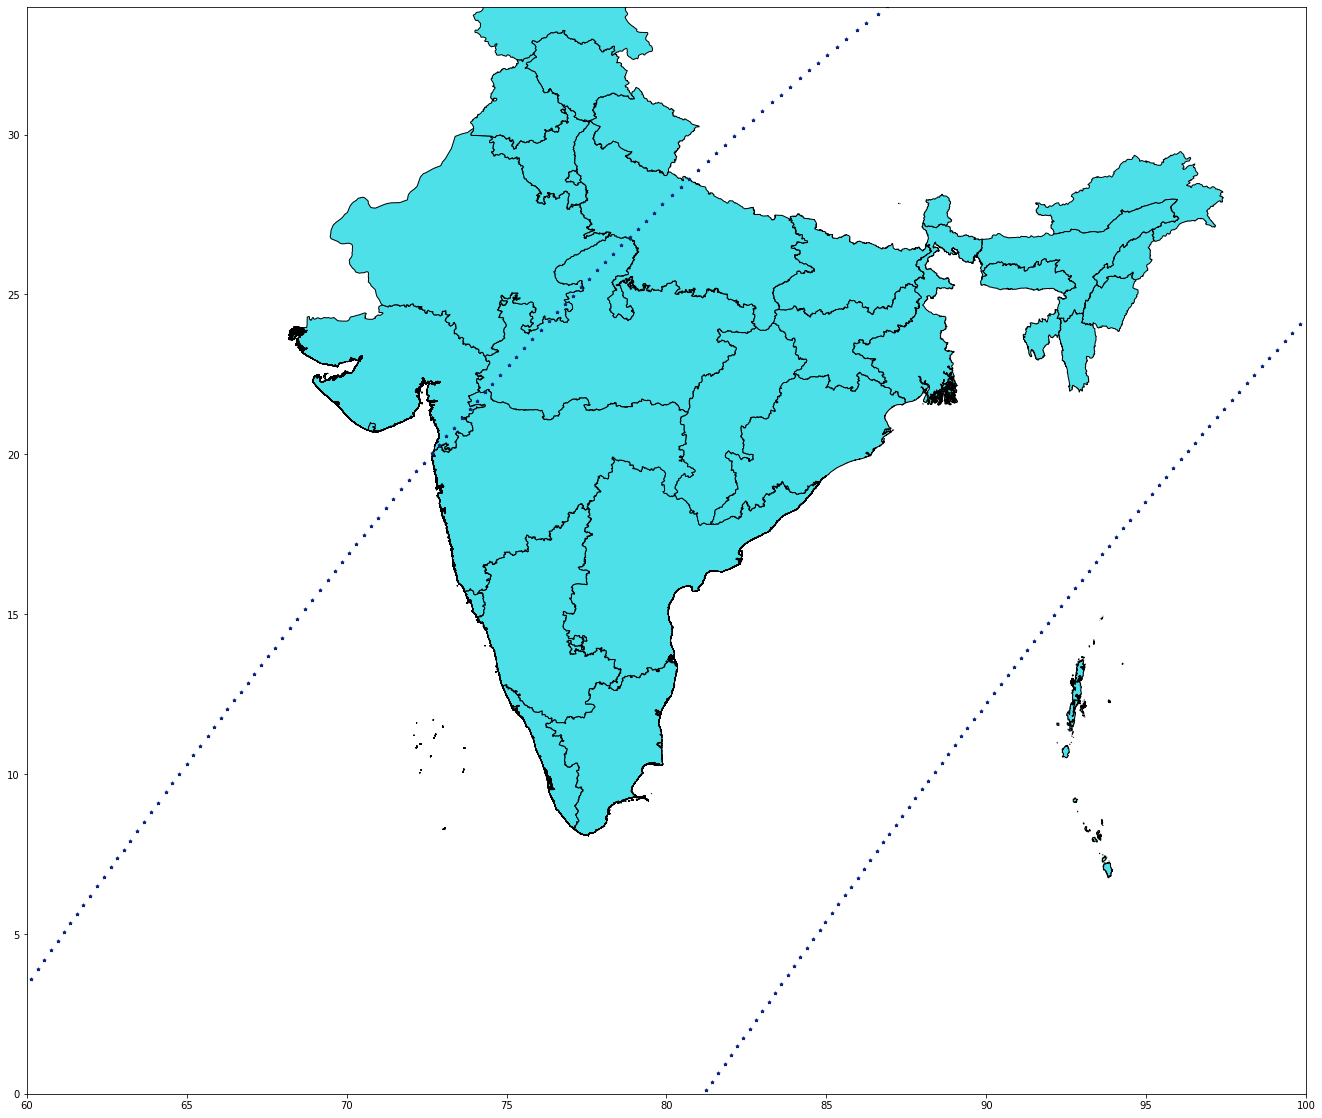

In [76]:
# Plotting to see the ISS overlay Indian Sub:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
ax.set_xlim([60, 100])
ax.set_ylim([0, 34])
base = ind.plot(ax=ax, color='#4DE0E8', edgecolor='black')

# plotting the ISS position over the eart with navy
geo_ISS.plot(ax=base, color='#0B2380', marker="*", markersize=10);

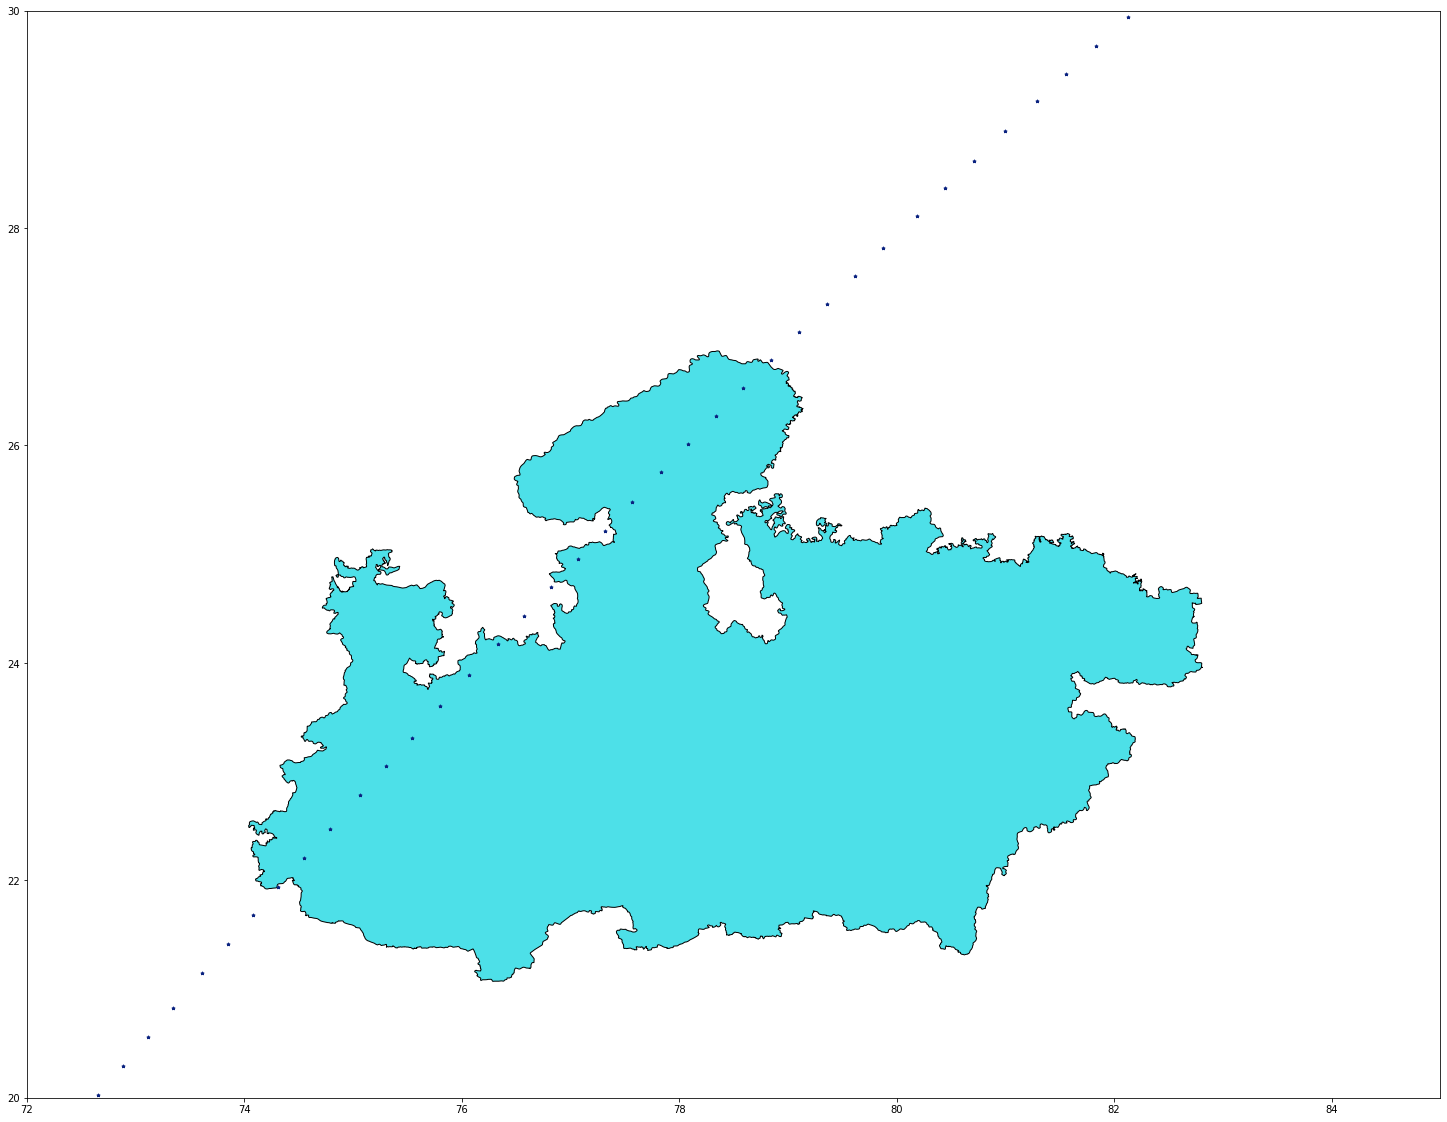

In [77]:
# Plotting to see the ISS overlay MP:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
ax.set_xlim([72,85])
ax.set_ylim([20,30])
base = mp.plot(ax=ax, color='#4DE0E8', edgecolor='black')

# plotting the ISS position over the eart with navy
geo_ISS.plot(ax=base, color='#0B2380', marker="*", markersize=10);